In [1]:
import tensorflow as tf

import pandas as pd

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import MobileNetV2, InceptionV3

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
data_gen = ImageDataGenerator(rotation_range=30, rescale=1./255, validation_split=0.2)

In [3]:
image_size = (224, 224)
train_gen = data_gen.flow_from_directory("/Users/iandong/CVFN/splittedFolder/train", target_size=image_size, shuffle=True, seed=42) # class_mode default categorical
test_gen = data_gen.flow_from_directory("/Users/iandong/CVFN/splittedFolder/test", target_size=image_size, shuffle=True, seed=42) # default batch_size is 32

Found 14140 images belonging to 101 classes.
Found 6060 images belonging to 101 classes.


In [4]:
input_shape = (224, 224, 3) # 224, 224 stands for w and h. The 3 stands for the three channels for RGB
mobile_net_model = MobileNetV2(input_shape=input_shape, weights="imagenet",include_top=False)
mobile_net_model.trainable = False

Metal device set to: Apple M1


In [5]:
model1 = Sequential()
model1.add(mobile_net_model)
model1.add(GlobalAveragePooling2D()) 
model1.add(Dense(64, activation="relu")) # 64 units
model1.add(Dropout(0.3))
model1.add(Dense(101, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 101)               6565      
                                                                 
Total params: 2,346,533
Trainable params: 88,549
Non-tra

In [6]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
earlystopping_mobile_net = EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

checkpoint_mobile_net = ModelCheckpoint(filepath='food_model.hdf5', verbose=1, save_best_only=True, save_weights_only=True)

In [8]:
history_mobile_net = model1.fit(train_gen, validation_data=test_gen, epochs=30, verbose=1, callbacks=[checkpoint_mobile_net, earlystopping_mobile_net])

Epoch 1/30


2023-04-18 20:15:42.741177: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


442/442 [==============================] - ETA: 0s - loss: 3.9920 - accuracy: 0.1119
Epoch 1: val_loss improved from inf to 3.07134, saving model to food_model.hdf5
442/442 [==============================] - 119s 266ms/step - loss: 3.9920 - accuracy: 0.1119 - val_loss: 3.0713 - val_accuracy: 0.2814
Epoch 2/30
442/442 [==============================] - ETA: 0s - loss: 3.0318 - accuracy: 0.2675
Epoch 2: val_loss improved from 3.07134 to 2.61179, saving model to food_model.hdf5
442/442 [==============================] - 120s 270ms/step - loss: 3.0318 - accuracy: 0.2675 - val_loss: 2.6118 - val_accuracy: 0.3705
Epoch 3/30
442/442 [==============================] - ETA: 0s - loss: 2.7070 - accuracy: 0.3315
Epoch 3: val_loss improved from 2.61179 to 2.47858, saving model to food_model.hdf5
442/442 [==============================] - 119s 269ms/step - loss: 2.7070 - accuracy: 0.3315 - val_loss: 2.4786 - val_accuracy: 0.3805
Epoch 4/30
442/442 [==============================] - ETA: 0s - loss: 

0.45313531160354614


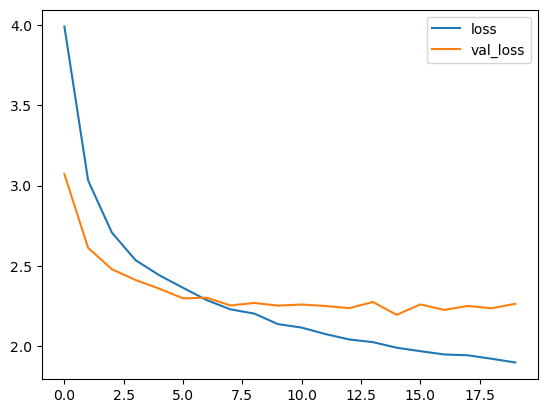

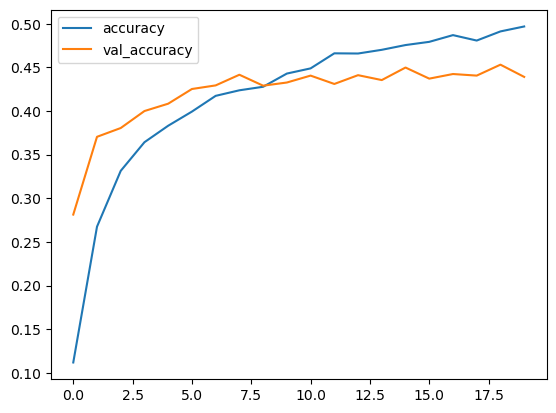

In [9]:
history_mobile_net_df = pd.DataFrame(history_mobile_net.history)
history_mobile_net_df.loc[:,['loss', 'val_loss']].plot()
history_mobile_net_df.loc[:,['accuracy', 'val_accuracy']].plot()
print(max(history_mobile_net_df['val_accuracy']))

In [10]:
inception_v3_model = InceptionV3(input_shape=input_shape, weights="imagenet",include_top=False)
inception_v3_model.trainable = False

In [11]:
model2 = Sequential()
model2.add(inception_v3_model)
model2.add(GlobalAveragePooling2D()) 
model2.add(Dense(64, activation="relu")) # 64 units
model2.add(Dropout(0.3))
model2.add(Dense(101, activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 101)               6565      
                                                                 
Total params: 21,940,485
Trainable params: 137,701
Non-trainable params: 21,802,784
____________________________________

In [12]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
earlystopping_inception_v3 = EarlyStopping(min_delta=0.001, patience=5, restore_best_weights=True)

checkpoint_inception_v3 = ModelCheckpoint(filepath='food_model2.hdf5', verbose=1, save_best_only=True, save_weights_only=True)

In [14]:
history_inception_v3 = model2.fit(train_gen, validation_data=test_gen, epochs=30, verbose=1, callbacks=[checkpoint_inception_v3, earlystopping_inception_v3])

Epoch 1/30
442/442 [==============================] - ETA: 0s - loss: 4.4088 - accuracy: 0.0407
Epoch 1: val_loss improved from inf to 4.04071, saving model to food_model2.hdf5
442/442 [==============================] - 128s 283ms/step - loss: 4.4088 - accuracy: 0.0407 - val_loss: 4.0407 - val_accuracy: 0.1233
Epoch 2/30
442/442 [==============================] - ETA: 0s - loss: 3.9260 - accuracy: 0.0984
Epoch 2: val_loss improved from 4.04071 to 3.63608, saving model to food_model2.hdf5
442/442 [==============================] - 121s 273ms/step - loss: 3.9260 - accuracy: 0.0984 - val_loss: 3.6361 - val_accuracy: 0.1599
Epoch 3/30
442/442 [==============================] - ETA: 0s - loss: 3.7043 - accuracy: 0.1254
Epoch 3: val_loss improved from 3.63608 to 3.36436, saving model to food_model2.hdf5
442/442 [==============================] - 120s 270ms/step - loss: 3.7043 - accuracy: 0.1254 - val_loss: 3.3644 - val_accuracy: 0.2195
Epoch 4/30
442/442 [==============================] - ET

442/442 [==============================] - 119s 269ms/step - loss: 3.1479 - accuracy: 0.2168 - val_loss: 2.9037 - val_accuracy: 0.2939
Epoch 29/30
442/442 [==============================] - ETA: 0s - loss: 3.1481 - accuracy: 0.2216
Epoch 29: val_loss did not improve from 2.89708
442/442 [==============================] - 119s 270ms/step - loss: 3.1481 - accuracy: 0.2216 - val_loss: 2.9134 - val_accuracy: 0.2972
Epoch 30/30
442/442 [==============================] - ETA: 0s - loss: 3.1466 - accuracy: 0.2173
Epoch 30: val_loss improved from 2.89708 to 2.89595, saving model to food_model2.hdf5
442/442 [==============================] - 120s 272ms/step - loss: 3.1466 - accuracy: 0.2173 - val_loss: 2.8959 - val_accuracy: 0.2952


0.2971947193145752


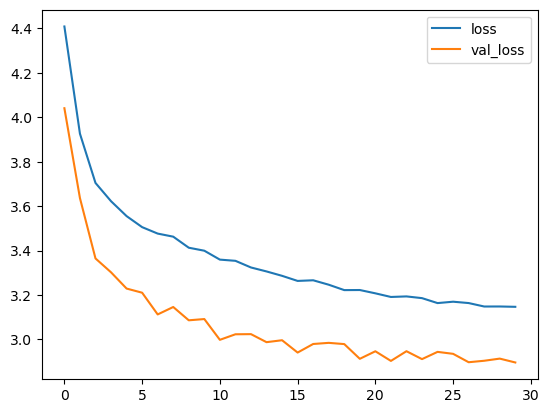

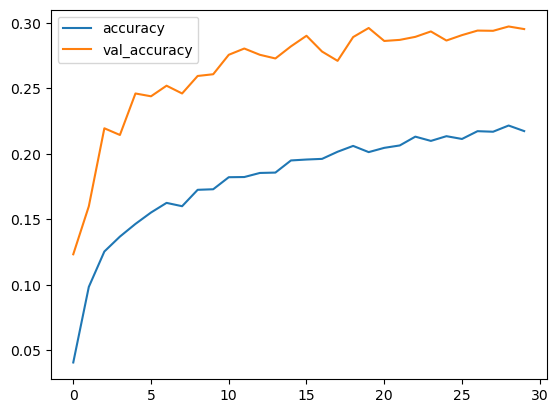

In [15]:
history_inception_v3_df = pd.DataFrame(history_inception_v3.history)
history_inception_v3_df.loc[:,['loss', 'val_loss']].plot()
history_inception_v3_df.loc[:,['accuracy', 'val_accuracy']].plot()
print(max(history_inception_v3_df['val_accuracy']))